In [44]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.interpolate import interp1d
from os import listdir
from os.path import isfile, join

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

matplotlib.rcParams['figure.figsize'] = [12, 8]

In [43]:
from notebook.services.config import ConfigManager
c = ConfigManager()
c.update('notebook', {"CodeCell": {"cm_config": {"autoCloseBrackets": False}}})

{'load_extensions': {'nbextensions_configurator/config_menu/main': True,
  'contrib_nbextensions_help_item/main': True,
  'spellchecker/main': True},
 'CodeCell': {'cm_config': {'autoCloseBrackets': False}}}

In [2]:
#import comsol data

#import box data

location = 'data/comsolData/biconAnd30cmDipole_box_60_60_57_0.5MHzRes_1.1.22/powerBicon_dBm.txt'

df_comsol_biconAnd30cmDipole_box_60_60_57 = pd.DataFrame()

df_comsol_biconAnd30cmDipole_box_60_60_57['Frequency'], \
    df_comsol_biconAnd30cmDipole_box_60_60_57['Power']= np.loadtxt(location, skiprows = 5, unpack = True)


#import move data
location = 'data/comsolData/'
df_comsol = pd.DataFrame()

df_comsol['Frequency'] = np.loadtxt(location + 'powerbicon_dBm_move24pts_160freqPts_1.8.21.txt', skiprows = 5, usecols = 3)
df_comsol['posX'] = np.loadtxt(location + 'powerbicon_dBm_move24pts_160freqPts_1.8.21.txt', skiprows = 5, usecols = 0)
df_comsol['posY'] = np.loadtxt(location + 'powerbicon_dBm_move24pts_160freqPts_1.8.21.txt', skiprows = 5, usecols = 1)
df_comsol['posZ'] = np.loadtxt(location + 'powerbicon_dBm_move24pts_160freqPts_1.8.21.txt', skiprows = 5, usecols = 2)
df_comsol['Power'] = np.loadtxt(location + 'powerbicon_dBm_move24pts_160freqPts_1.8.21.txt', skiprows = 5, usecols = 4)

df_comsol



,Frequency,posX,posY,posZ,Power
0,60.000000,-0.698,-0.3122,-1.204,-68.131123
1,62.222222,-0.698,-0.3122,-1.204,-65.113583
2,64.444444,-0.698,-0.3122,-1.204,-61.822011
3,66.666667,-0.698,-0.3122,-1.204,-58.094294
4,68.888889,-0.698,-0.3122,-1.204,-53.618336
...,...,...,...,...,...
2875,247.979798,0.701,0.6790,0.015,-38.244275
2876,248.484848,0.701,0.6790,0.015,-39.514060
2877,248.989899,0.701,0.6790,0.015,-45.971254
2878,249.494949,0.701,0.6790,0.015,-24.836778


In [3]:
#import real data

df_real = pd.DataFrame()

fileList = [f for f in listdir('data/realData/') if isfile(join('data/realData/', f))]

for file in fileList:
    print(file)
    print(pd.read_pickle('data/realData/' + file).head())
    df_real = df_real.append(pd.read_pickle('data/realData/' + file))

df_real = df_real.rename(columns={'Raw Power (dBm)': 'Power', 'Frequency (MHz)' : 'Frequency'})
df_real

2022-01-08_15-15_n0.698x_0.174y_0.015z.pkl
   Frequency (MHz)      x      y      z  Raw Power (dBm)
0         5.000000 -0.698  0.174  0.015       -77.763084
1         5.029503 -0.698  0.174  0.015       -77.755943
2         5.059006 -0.698  0.174  0.015       -77.857147
3         5.088509 -0.698  0.174  0.015       -78.018196
4         5.118012 -0.698  0.174  0.015       -78.182091
2022-01-08_14-48_0.002x_0.174y_0.015z.pkl
   Frequency (MHz)      x      y      z  Raw Power (dBm)
0         5.000000  0.002  0.174  0.015       -83.280190
1         5.029503  0.002  0.174  0.015       -83.530319
2         5.059006  0.002  0.174  0.015       -83.676651
3         5.088509  0.002  0.174  0.015       -83.474495
4         5.118012  0.002  0.174  0.015       -83.826828
2022-01-08_14-46_0.002x_0.014y_0.015z.pkl
   Frequency (MHz)      x      y      z  Raw Power (dBm)
0         5.000000  0.002  0.014  0.015       -82.719032
1         5.029503  0.002  0.014  0.015       -83.057007
2         5.059006

,Frequency,x,y,z,Power
0,5.000000,-0.698,0.174,0.015,-77.763084
1,5.029503,-0.698,0.174,0.015,-77.755943
2,5.059006,-0.698,0.174,0.015,-77.857147
3,5.088509,-0.698,0.174,0.015,-78.018196
4,5.118012,-0.698,0.174,0.015,-78.182091
...,...,...,...,...,...
9995,299.881988,0.002,-0.312,-1.204,-26.724874
9996,299.911491,0.002,-0.312,-1.204,-26.847706
9997,299.940994,0.002,-0.312,-1.204,-27.080694
9998,299.970497,0.002,-0.312,-1.204,-27.438097


In [4]:
df_real.value_counts('y')
#I think I got off on my heights :(

y     
 0.174    70000
 0.014    60000
-0.312    50000
dtype: int64

In [5]:
df_comsol.groupby('Frequency').Power.mean()
df_real.groupby('Frequency').Power.mean()

Frequency
5.000000     -89.318175
5.029503     -89.437403
5.059006     -89.471972
5.088509     -89.516042
5.118012     -89.580539
                ...    
299.881988   -36.909313
299.911491   -36.773534
299.940994   -36.660587
299.970497   -36.563144
300.000000   -36.474699
Name: Power, Length: 10000, dtype: float64

In [6]:
df_comsol.groupby(['Frequency', 'posY']).Power.mean()

Frequency   posY   
60.000000   -0.3122   -63.416006
             0.0140   -62.947244
             0.6790   -67.821861
62.222222   -0.3122   -60.718492
             0.0140   -60.218455
                         ...    
249.494949   0.0140   -36.533380
             0.6790   -35.047344
250.000000  -0.3122   -35.066625
             0.0140   -25.406319
             0.6790   -28.660265
Name: Power, Length: 480, dtype: float64

In [21]:
freqArr = np.asarray(df_comsol.groupby('Frequency').mean().iloc[:,3].index)
powerArrMean = np.asarray(df_comsol.groupby('Frequency').mean().iloc[:,3])
powerArrMedian = np.asarray(df_comsol.groupby('Frequency').median().iloc[:,3])

Text(0, 0.5, 'Power (dBm)')

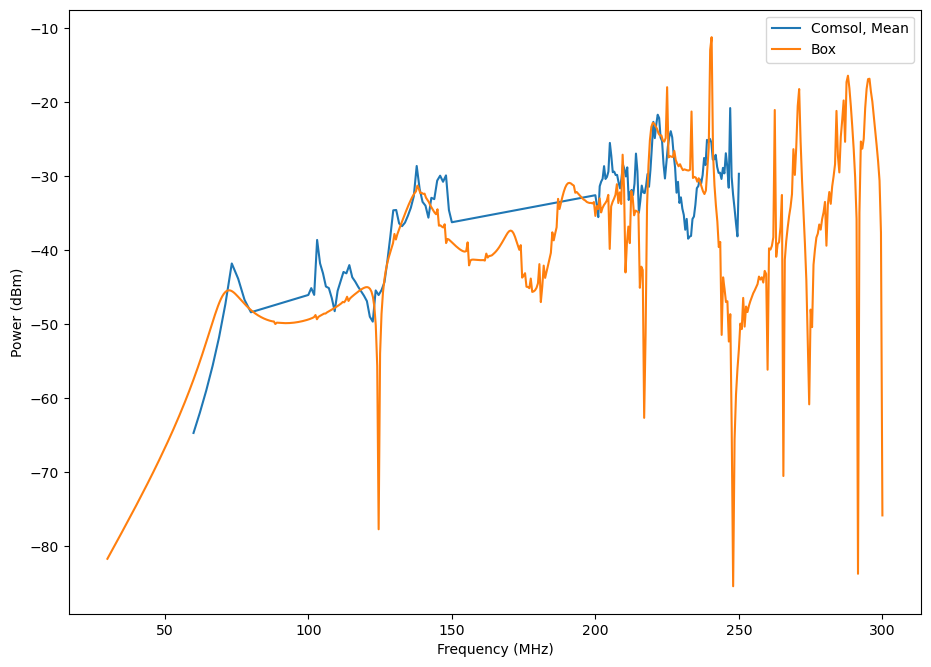

In [49]:
%matplotlib inline

plt.figure(figsize=(11, 8), dpi=100)
plt.plot(freqArr, powerArrMean, label = "Comsol, Mean")
#plt.plot(freqArr, powerArrMedian, label = "Move Bicon, Median")
plt.plot(df_comsol_biconAnd30cmDipole_box_60_60_57['Frequency'], df_comsol_biconAnd30cmDipole_box_60_60_57['Power']- 8.57, label = 'Box')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel("Power (dBm)")

In [55]:
%matplotlib qt

plt.figure(figsize=(11, 8), dpi=100)
plt.title('Move Bicon, Comsol vs Real Data')
plt.plot( df_real.groupby('Frequency').Power.mean() + 2, label = 'Real+2dB')
#plt.plot( df_real.groupby('Frequency').Power.median(), label = 'Real median')
plt.plot(freqArr[0:10], powerArrMean[0:10] - 2.8, '#ff7f0e', label = "Comsol-2.8dB, Mean")
plt.plot(freqArr[11:60], powerArrMean[11:60] - 2.8, '#ff7f0e')
plt.plot(freqArr[61:160], powerArrMean[61:160] - 2.8, '#ff7f0e')
#plt.plot(freqArr, powerArrMedian, label = "Move Bicon, Median")

plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel("Power (dBm)")

'''
x = [60, 80]
y = [-20, -20]
plt.fill_between(x, y, -90,
                 color = 'blue',
                 alpha = .2)

x = [100, 150]
y = [-20, -20]
plt.fill_between(x, y, -90,
                 color = 'blue',
                 alpha = .2)

x = [200, 250]
y = [-20, -20]
plt.fill_between(x, y, -90,
                 color = 'blue',
                 alpha = .2)
'''

"\nx = [60, 80]\ny = [-20, -20]\nplt.fill_between(x, y, -90,\n                 color = 'blue',\n                 alpha = .2)\n\nx = [100, 150]\ny = [-20, -20]\nplt.fill_between(x, y, -90,\n                 color = 'blue',\n                 alpha = .2)\n\nx = [200, 250]\ny = [-20, -20]\nplt.fill_between(x, y, -90,\n                 color = 'blue',\n                 alpha = .2)\n"

In [11]:
%matplotlib qt 
plt.plot(freqArr, df_comsol.groupby(['Frequency', 'posX']).Power.mean(), label = "Move Bicon X")
plt.plot(df_comsol_biconAnd30cmDipole_box_60_60_57['Frequency (MHz)'], df_comsol_biconAnd30cmDipole_box_60_60_57['Power (dBm)']- 8.57, label = 'Box')
plt.legend()
plt.xlabel('Frequency (MHz)')
plt.ylabel("Power (dBm)")
    

ValueError: x and y must have same first dimension, but have shapes (160,) and (480,)